<a href="https://colab.research.google.com/github/hikmatfarhat-ndu/pytorch/blob/main/dl_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What you will learn in this notebook
 
1. PyTorch tensors and operations on them
1. PyTorch autograd and backward method
1. PyTorch packages autograd, torchvision, datasets


### PyTorch Tensors
- A PyTorch ```tensor``` is an object that stores a multidimensional array
- A ```tensor``` according to [PyTorch documentation](https://pytorch.org/docs/stable/tensors.html) is a multidimensional matrix containing elements of a single data type.
- In addition to the data, a tensor has a large number of attributes and functions
- A PyTorch tensor has a similar interface to numpy arrays

### PyTorch Tensors

In [2]:
import torch
# a 2-dim tensor created from a list of lists
b=torch.tensor([[1,2,3],[4,5,6]],dtype=torch.float32)
print("b={}".format(b))
print("b has dimensions {}".format(b.shape))
#torch.Size() is iterable so we can create a list or tuple
print("b has dimensions {}".format(tuple(b.shape)))


b=tensor([[1., 2., 3.],
        [4., 5., 6.]])
b has dimensions torch.Size([2, 3])
b has dimensions (2, 3)


### PyTorch Tensors

In [15]:

# A 0-dim tensor. Without dtype it will be implicitly an integer
a=torch.tensor(1,dtype=torch.float32)
print(a)
print(a.shape)
# use .item() to extract a scalar from a 0-d tensor
print("single value in a is {}".format(a.item()))

tensor(1.)
torch.Size([])
single value in a is 1.0


tensor([1.])

### Tensor slices
- Indexing and slices are similar to numpy


In [16]:
print(b)
print(tuple(b.size()))
#print row index 0
print(b[0,:])
#print column index 1
print(b[:,1])

tensor([[1., 2., 3.],
        [4., 5., 6.]])
(2, 3)
tensor([1., 2., 3.])
tensor([2., 5.])


### From/to numpy 

In [19]:
import numpy as np
a=np.array([[1,2,3],[4,5,6]],dtype=np.float32)
b=torch.from_numpy(a)
print("b={}".format(b))
print("b has {} as data type".format(b.dtype))
print("convert b to numpy array")
print(b.numpy())

b=tensor([[1., 2., 3.],
        [4., 5., 6.]])
b has torch.float32 as data type
convert b to numpy array
[[1. 2. 3.]
 [4. 5. 6.]]


### Useful PyTorch operations

In [1]:
# Create a tensor of shape (2,3) whose values are all zeros 
a=torch.zeros([2,3])
print(a)
# Same as above but filled with ones
a=torch.ones([3,2])
print(a)
# Same as above but filled with random values from a uniform distribution over [0,1] 
# https://pytorch.org/docs/stable/generated/torch.rand.html
a=torch.rand([2,3])
# See also randn for a normal distribution
#https://pytorch.org/docs/stable/generated/torch.randn.html

print(a)


NameError: name 'torch' is not defined

### Useful operations for creating tensors

In [7]:
# A tensor filled with ones that has the same dimensions as tensor a
b=torch.ones_like(a)
print(b)

# Transpose a tensor
a=torch.tensor([[1,2,3],[4,5,6]])
print("a=")
print(a)
print("transpose of a=")
print(a.transpose(0,1))

tensor([[1., 1., 1.],
        [1., 1., 1.]])
a=
tensor([[1, 2, 3],
        [4, 5, 6]])
transpose of a=
tensor([[1, 4],
        [2, 5],
        [3, 6]])


### squeeze/unsqueeze/stack
- In some situations one might need to add/remove dimensions from a tensor
- This can only be done if added/removed dimensionality size is one
- For example, a tensor of shape (1,3,3) or (2,1,2)
- Can be converted to (3,3) and (2,2)
- and vice-versa


In [28]:
a=torch.tensor([[1,2,3],[4.,5.,6.]])
print("a's original shape",tuple(a.size()))
print("a's shape after unsqueeze",tuple(a.unsqueeze(0).size()))
print("a's shape after unsqueezing a different dimension",tuple(a.unsqueeze(1).size()))
a.reshape(6)

a's original shape (2, 3)
a's shape after squeeze (1, 2, 3)
a's shape after squeezing a different dimension (2, 1, 3)


tensor([1., 2., 3., 4., 5., 6.])

In [31]:
a=torch.tensor([1.,2,3])
b=torch.tensor([4,5.,6])
c=torch.stack([a,b])
print(c)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


AttributeError: 'Tensor' object has no attribute 'reshape_'

### In-place tensor operations

- Given a tensor A
- Some operations on A create a copy of A
- Some operations (in-place) modify the tensor A itself. Usually have a "_" suffix

In [10]:
a=torch.tensor([[1,2,3],[4,5,6]],dtype=torch.float32)
a.unsqueeze(0).shape

torch.Size([1, 2, 3])

In [11]:
print(a.size())

torch.Size([2, 3])


In [13]:
a.unsqueeze_(0)
print(a.size())

torch.Size([1, 1, 2, 3])


### More about in-place operations
- In addition to methods with an underscore suffix the following are also in-place
- +=,-=,*=,/=,
- using an index or slice, e.g. x[0]=2

In [18]:
x=torch.tensor([1.,2])
y=torch.tensor([3.,4])
print(id(x))
x=x+y # a new tensor is allocated
print(id(x))
x+=y # this is an in-place operation
print(id(x))

140368111034640
140371479780608
140371479780608
140371479780608
tensor([ 9., 10.])


In [19]:
x=torch.tensor([1.,2])
y=torch.tensor([3.,4])
x=x+y # a new tensor is allocated
x+=y # this is an in-place operation
print(id(x))
x[0]=9
print(id(x))
print(x)

140368111034720
140368111034720
tensor([ 9., 10.])


### Autograd package

- Deep learning involves optimization that require the computation of gradients
- An example was the linear regression discussed previously 
- Using PyTorch's Autograd package one can automatically differentiate any function

In [5]:
from torch.autograd import grad
x=torch.tensor(3.,requires_grad=True)
y=torch.tensor(2.,requires_grad=True)
z=x**2+4*y
r=grad(z,[x,y])
print(r)

(tensor(6.), tensor(4.))


### Using ```.backward()```

- An alternative may is to use the ```tensor.backward()``` method
- Unlike ```grad``` it does not return the gradients but **saves** them in ```.grad``` attribute of the dependent tensors

In [7]:
x=torch.tensor(3.,requires_grad=True)
y=torch.tensor(2.,requires_grad=True)
z=x**2+4*y
z.backward()
print(x.grad,y.grad)

tensor(6.) tensor(4.)


## PyTorch Dataset
- PyTorch has many built-in datasets 
- They are all subclasses of ```torch.utils.data.Datasets```
- A subset of those datasets can be access in the ```torchvision.datasets```
- In the following example we will use the CIFAR10 dataset

- In most deep learning problem one needs a training dataset to train the model
- And a test dataset to gauge how well the trained model generalizes to unseen data

In [1]:
import torchvision as vision
# train=True is the default
cifar10_train=vision.datasets.CIFAR10(".",download=True,train=True)
cifar10_test=vision.datasets.CIFAR10(".",download=True,train=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting .\cifar-10-python.tar.gz to .
Files already downloaded and verified


### Exploring the dataset
- Almost always it helps to get an idea of the properties of the dataset
- For example, how many items

In [15]:
import numpy as np
train_samples=len(cifar10_train)
test_samples=len(cifar10_test)
print("The length of training data is {} and the test data is {}".format(train_samples,test_samples))


The length of training data is 50000 and the test data is 10000


numpy.ndarray

- Classification datasets
- "raw" values are in ```dataset.data``` and ```dataset.targets```


In [19]:
np.unique(cifar10_train.targets)
print("data type={}, targets type={}".format(type(cifar10_train.data),type(cifar10_train.targets)))
print("possible targets values:")
np.unique(cifar10_train.targets)


data type=<class 'numpy.ndarray'>, targets type=<class 'list'>
possible targets values


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Iterating over a dataset
- Because datasets are **iterable** objects (see explanation [here](https://docs.python.org/3/glossary.html) ) the best way to explore the items is through an iterator.

In [3]:
# create an iterator to the dataset
itr=iter(cifar10_train)
#fetch the next item
item =next(itr)
print(type(item))

<class 'tuple'>


In [4]:
len(item)

2

In [5]:
img,label=item
print("First element has type={}, second has type={}".format(type(img),type(label)))

First element has type=<class 'PIL.Image.Image'>, second has type=<class 'int'>


### Can one iterate over the whole dataset?

In [21]:
itr=iter(cifar10_train)
count=0
while True:
    try:
        img,label=next(itr)
        count+=1
    except StopIteration:
        break
print(count)

50000


### for loop to the rescue
- That was the "low level" way of iteration over an **iterable**
- Python provides a "for" construct that hides those details

In [23]:
count=0
for item  in cifar10_train:
    img,label=item
    count+=1
print(count)

50000


### Visualizing the images

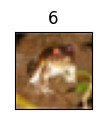

In [11]:
# Plot the first image (a frog) and set the corresponding label as title

import matplotlib.pyplot as plt
fig=plt.figure()
fig.set_size_inches(1,1)
p=fig.add_subplot()

p.set_title(str(label0))
p.axes.get_xaxis().set_visible(False)
p.axes.get_yaxis().set_visible(False)
plt.imshow(img0)